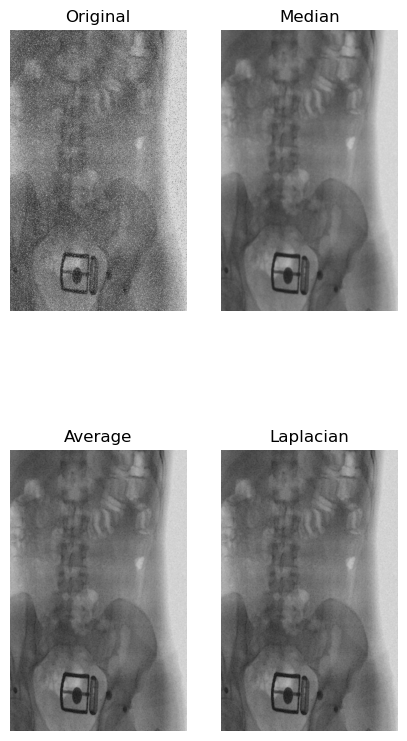

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('Noisy_Spine.png', 0)

# A
med = cv.medianBlur(img, 5)

# B
avg = cv.GaussianBlur(med, (3, 3), 0)

# C
lap_kernel = np.array([[1, 1, 1],
                      [1, -8,1],
                      [1, 1, 1]])
mask = cv.filter2D(avg, -1, lap_kernel)

avg = avg - (1)*mask

avg[np.where(avg < 0)] = 0
avg[np.where(avg > 255)] = 255

lap = avg.astype(np.uint8)

# D
fig, ax = plt.subplots(2, 2, figsize=(5, 10))
ax = plt.subplot(2, 2, 1)
ax.set_title('Original')
plt.imshow(img, cmap='gray', vmin=0 , vmax=255)
ax.axis('off')

ax = plt.subplot(2, 2, 2)
ax.set_title('Median')
ax.imshow(med, cmap='gray',  vmin=0 , vmax=255)
ax.axis('off')

ax = plt.subplot(2, 2, 3)
ax.set_title('Average')
ax.imshow(avg, cmap='gray',  vmin=0 , vmax=255)
ax.axis('off')

ax = plt.subplot(2, 2, 4)
ax.set_title('Laplacian')
ax.imshow(lap, cmap='gray',  vmin=0 , vmax=255)
ax.axis('off')

plt.show()

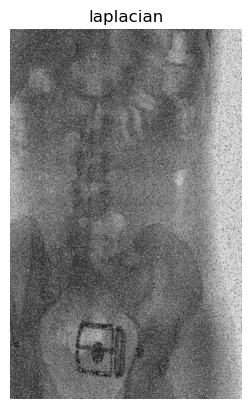

In [2]:
# D
avg = cv.GaussianBlur(img, (5, 5), 0)

med = cv.medianBlur(avg, 3)

lap_kernel = np.array([[1, 1, 1],
                      [1, -8,1],
                      [1, 1, 1]])
mask = cv.filter2D(med, -1, lap_kernel)

med = med - (1)*mask

med[np.where(med < 0)] = 0
med[np.where(med > 255)] = 255

lap = med.astype(np.uint8)

plt.title('laplacian')
plt.imshow(lap, cmap='gray',  vmin=0 , vmax=255)
plt.axis(False)
plt.show()